In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 189 kB 7.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 


# cnn_learner for Image Classification

In [ ]:
from fastai.vision.all import *

In [ ]:
# all_slow

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

In [ ]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_128.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_85.jpg'))

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

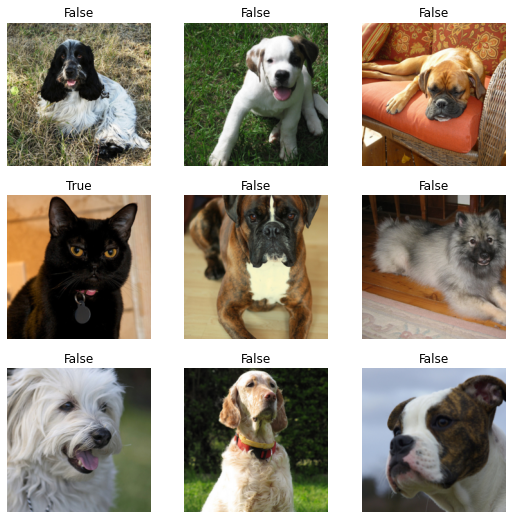

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.141507,0.027520,0.009472,35:16


epoch,train_loss,valid_loss,error_rate,time
0,0.051113,0.014846,0.008119,51:28


In [ ]:
learn.predict(files[0])

('True', TensorBase(1), TensorBase([4.5027e-13, 1.0000e+00]))

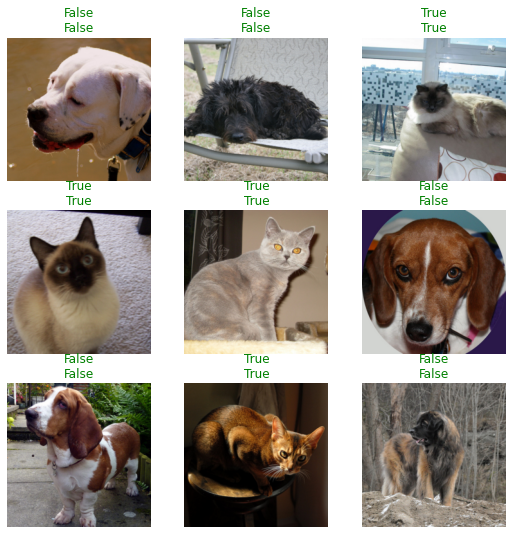

In [ ]:
learn.show_results()

# unet_learner for Segmentation


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

### Segmentation - Using the high-level API

In [ ]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0001TP_008670.png')

In [ ]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f02370_P.png')

In [ ]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


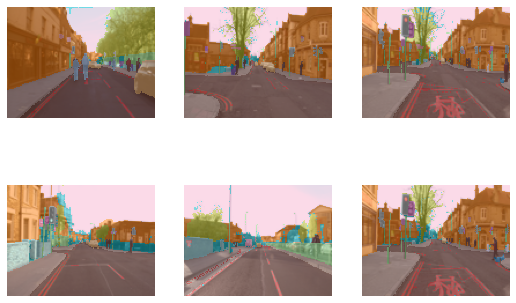

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.627012,2.344536,01:18


epoch,train_loss,valid_loss,time
0,1.846898,1.687265,01:26
1,1.597655,1.396289,01:21
2,1.410895,1.149633,01:20
3,1.268781,1.027054,01:22
4,1.141219,0.957177,01:20
5,1.044629,0.893716,01:20


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


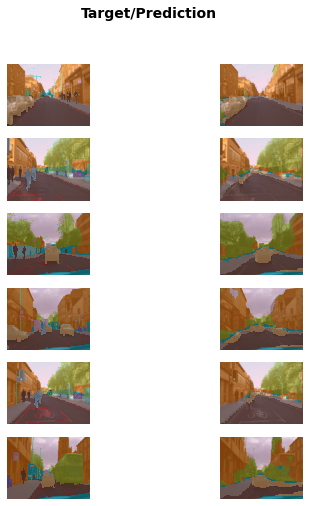

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


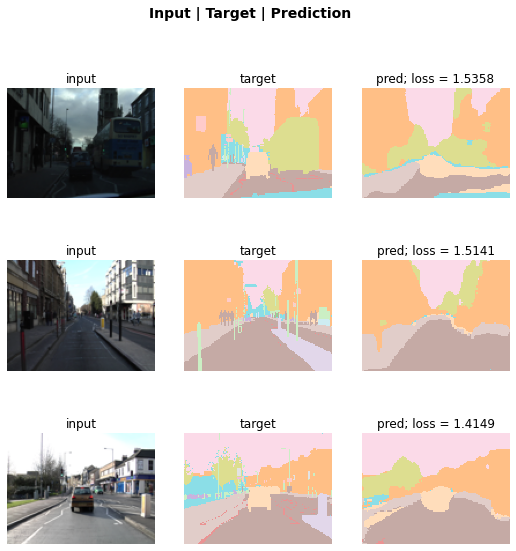

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

# text_classifier_learner for Sentiment Analysis

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.465888,0.396368,0.824800,07:50


epoch,train_loss,valid_loss,accuracy,time
0,0.316501,0.239205,0.904120,15:19
1,0.246090,0.249809,0.898560,15:23
2,0.187470,0.200633,0.926000,15:29
3,0.142198,0.199390,0.927920,15:29


In [ ]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([4.2066e-05, 9.9996e-01]))

# tabular_learner for Decisiontree

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.465888,0.396368,0.824800,07:50


epoch,train_loss,valid_loss,accuracy,time
0,0.316501,0.239205,0.904120,15:19
1,0.246090,0.249809,0.898560,15:23
2,0.187470,0.200633,0.926000,15:29
3,0.142198,0.199390,0.927920,15:29


In [ ]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([4.2066e-05, 9.9996e-01]))

#collab_learner for Ranking

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:00


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:00
1,1.248513,1.186878,00:00
2,1.005707,0.874296,00:00
3,0.795088,0.737238,00:00
4,0.682730,0.704470,00:00
5,0.642642,0.695310,00:00
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:00
9,0.611634,0.688576,00:00


In [ ]:
learn.show_results()


,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257
